# make plots
#### 9 Dec 2025

###  notes

In [1]:
import os
os.listdir()

['figures',
 '.ipynb_checkpoints',
 'example',
 'test',
 'make_dfs.ipynb',
 'out',
 'make_plots.ipynb',
 'vcf_stage',
 'run.sh',
 'description.txt']

### get started

#### import modules

In [2]:
import os

In [3]:
from tqdm.notebook import tqdm

In [4]:
import time
for i in tqdm(range(100)):
    time.sleep(0.05) # Simulate some work

  0%|          | 0/100 [00:00<?, ?it/s]

In [5]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.colors import TwoSlopeNorm
import matplotlib.ticker as ticker

from scipy.stats import gaussian_kde
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

import itertools
from itertools import combinations

from Bio import SeqIO, AlignIO

import shutil

import warnings

# read in dfs

In [6]:
inf_all = pd.read_csv('out/inf_all.csv')
inf_all

,mu,pm,rr,rep,bin,r2,kind,n_trees_sim,n_trees_inf
0,1.000000e-10,0.001,1.000000e-13,0,1,0.915093,inferred,1,3
1,1.000000e-10,0.001,1.000000e-13,0,2,0.915093,inferred,1,3
2,1.000000e-10,0.001,1.000000e-13,0,3,0.915093,inferred,1,3
3,1.000000e-10,0.001,1.000000e-13,0,4,0.915093,inferred,1,3
4,1.000000e-10,0.001,1.000000e-13,0,5,0.915093,inferred,1,3
...,...,...,...,...,...,...,...,...,...
690,1.000000e-07,3.000,3.000000e-07,0,25,0.376952,inferred,137234,9914
691,1.000000e-07,3.000,3.000000e-07,0,26,0.450914,inferred,137234,9914
692,1.000000e-07,3.000,3.000000e-07,0,27,0.388364,inferred,137234,9914
693,1.000000e-07,3.000,3.000000e-07,0,28,0.277969,inferred,137234,9914


In [7]:
null_all = pd.read_csv('out/null_all.csv')
null_all['kind'] = 'null'

#add n_trees vals to null df
to_merge = inf_all[['mu', 'rr', 'n_trees_sim', 'n_trees_inf']]
null_all = pd.merge(null_all, to_merge, on=['mu', 'rr'], how='left')

null_all

,mu,pm,rr,rep,bin,r2,kind,n_trees_sim,n_trees_inf
0,1.000000e-10,0.001,1.000000e-13,0,1,0.915093,null,1,3
1,1.000000e-10,0.001,1.000000e-13,0,1,0.915093,null,1,3
2,1.000000e-10,0.001,1.000000e-13,0,1,0.915093,null,1,3
3,1.000000e-10,0.001,1.000000e-13,0,1,0.915093,null,1,3
4,1.000000e-10,0.001,1.000000e-13,0,1,0.915093,null,1,3
...,...,...,...,...,...,...,...,...,...
194380,1.000000e-07,3.000,3.000000e-07,0,29,0.120988,null,137234,9914
194381,1.000000e-07,3.000,3.000000e-07,0,29,0.120988,null,137234,9914
194382,1.000000e-07,3.000,3.000000e-07,0,29,0.120988,null,137234,9914
194383,1.000000e-07,3.000,3.000000e-07,0,29,0.120988,null,137234,9914


In [8]:
inf_all['pm'].unique()

array([1.e-03, 1.e-02, 1.e-01, 3.e-01, 1.e+00, 3.e+00])

In [9]:
inf_all['rr'].unique()

array([1.e-13, 1.e-12, 1.e-12, 1.e-11, 3.e-11, 1.e-10, 1.e-10, 3.e-10,
       1.e-09, 3.e-09, 1.e-08, 3.e-08, 3.e-08, 1.e-07, 3.e-07])

In [10]:
inf_all[inf_all['mu'] == 1e-07]['rr'].unique()

array([1.e-10, 1.e-09, 1.e-08, 3.e-08, 1.e-07, 3.e-07])

# plotting

### additional x axis: expected number of breakpoints (num_trees - 1) ::: recombination rate

In [11]:
inf_all['breakpoints_sim'] = inf_all['n_trees_sim'] - 1
inf_all['breakpoints_inf'] = inf_all['n_trees_inf'] - 1

null_all['breakpoints_sim'] = null_all['n_trees_sim'] - 1
null_all['breakpoints_inf'] = null_all['n_trees_inf'] - 1

In [12]:
tree_counts = inf_all[['mu', 'pm', 'rr', 'breakpoints_sim', 'breakpoints_inf']]
tree_counts = tree_counts.groupby(['mu', 'rr']).agg(expected_breakpoints = ('breakpoints_sim', 'mean'))
tree_counts

expected_breakpoints
mu           rr                                
1.000000e-10 1.000000e-13                   0.0
             1.000000e-12                   1.0
             1.000000e-11                   8.0
             3.000000e-11                  13.0
             1.000000e-10                  49.0
             3.000000e-10                 150.0
1.000000e-09 1.000000e-12                   1.0
             1.000000e-11                   8.0
             1.000000e-10                  49.0
             3.000000e-10                 150.0
             1.000000e-09                 482.0
             3.000000e-09                1437.0
1.000000e-08 1.000000e-11                   8.0
             1.000000e-10                  49.0
             1.000000e-09                 482.0
             3.000000e-09                1437.0
             1.000000e-08                4664.0
             3.000000e-08               13991.0
1.000000e-07 1.000000e-10                  49.0
             1.000000e-09                 482.0
             1.000000e-08                4664.0
             3.000000e-08               13991.0
             1.000000e-07               46222.0
             3.000000e-07              137233.0

#### add breakpoints back to inf_all, null_all dfs

In [13]:
inf_all['avg_breakpoints'] = inf_all.groupby(['mu', 'rr'])['breakpoints_sim'].transform('mean')
null_all['avg_breakpoints'] = null_all.groupby(['mu', 'rr'])['breakpoints_sim'].transform('mean')

In [14]:
inf_all

,mu,pm,rr,rep,bin,r2,kind,n_trees_sim,n_trees_inf,breakpoints_sim,breakpoints_inf,avg_breakpoints
0,1.000000e-10,0.001,1.000000e-13,0,1,0.915093,inferred,1,3,0,2,0.0
1,1.000000e-10,0.001,1.000000e-13,0,2,0.915093,inferred,1,3,0,2,0.0
2,1.000000e-10,0.001,1.000000e-13,0,3,0.915093,inferred,1,3,0,2,0.0
3,1.000000e-10,0.001,1.000000e-13,0,4,0.915093,inferred,1,3,0,2,0.0
4,1.000000e-10,0.001,1.000000e-13,0,5,0.915093,inferred,1,3,0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
690,1.000000e-07,3.000,3.000000e-07,0,25,0.376952,inferred,137234,9914,137233,9913,137233.0
691,1.000000e-07,3.000,3.000000e-07,0,26,0.450914,inferred,137234,9914,137233,9913,137233.0
692,1.000000e-07,3.000,3.000000e-07,0,27,0.388364,inferred,137234,9914,137233,9913,137233.0
693,1.000000e-07,3.000,3.000000e-07,0,28,0.277969,inferred,137234,9914,137233,9913,137233.0


In [15]:
# plot 
# x = recombination rate, 
# y = expected number of recombination breakpoints; also plot inferred number recombination breakpoints in dif color 

inf_all[['mu', 'pm', 'rr', 'breakpoints_sim', 'breakpoints_inf']].groupby(['pm', 'rr']).mean()

mu  breakpoints_sim  breakpoints_inf
pm    rr                                                          
0.001 1.000000e-13  1.000000e-10              0.0              2.0
      1.000000e-12  1.000000e-09              1.0              2.0
      1.000000e-11  1.000000e-08              8.0             19.0
      1.000000e-10  1.000000e-07             49.0            130.0
0.010 1.000000e-12  1.000000e-10              1.0              2.0
      1.000000e-11  1.000000e-09              8.0             15.0
      1.000000e-10  1.000000e-08             49.0             63.0
      1.000000e-09  1.000000e-07            482.0            625.0
0.100 1.000000e-11  1.000000e-10              8.0              4.0
      1.000000e-10  1.000000e-09             49.0             22.0
      1.000000e-09  1.000000e-08            482.0            285.0
      1.000000e-08  1.000000e-07           4664.0           2361.0
0.300 3.000000e-11  1.000000e-10             13.0              2.0
      3.000000e-10  1.000000e-09            150.0             46.0
      3.000000e-09  1.000000e-08           1437.0            443.0
      3.000000e-08  1.000000e-07          13991.0           4178.0
1.000 1.000000e-10  1.000000e-10             49.0              4.0
      1.000000e-09  1.000000e-09            482.0             82.0
      1.000000e-08  1.000000e-08           4664.0            687.0
      1.000000e-07  1.000000e-07          46222.0           7149.0
3.000 3.000000e-10  1.000000e-10            150.0             12.0
      3.000000e-09  1.000000e-09           1437.0            113.0
      3.000000e-08  1.000000e-08          13991.0            970.0
      3.000000e-07  1.000000e-07         137233.0           9913.0

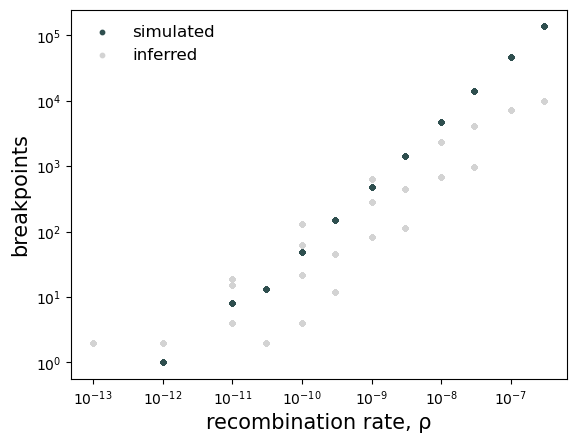

In [161]:
plt.figure()
plt.scatter(inf_all["rr"], inf_all["n_trees_sim"]-1, label="simulated", alpha = 1, c = 'darkslategrey', s = 10)
plt.scatter(inf_all["rr"], inf_all["n_trees_inf"]-1, label="inferred", alpha = 1, c = 'lightgrey', s =10)

plt.xlabel("recombination rate, ρ", fontsize=15)
plt.ylabel("breakpoints", fontsize=15)


#plt.xlim(7e-14, 4e-8)
plt.xscale("log") 
plt.gca().xaxis.set_minor_locator(ticker.NullLocator())
plt.yscale("log")
plt.gca().yaxis.set_minor_locator(ticker.NullLocator())

#plt.ylim(-100, )

plt.legend(loc = 'upper left', frameon = False, fontsize=12)
#plt.savefig("trees_by_rho.png") 
plt.show()


In [17]:
inf_all["mu"].unique()

array([1.e-10, 1.e-09, 1.e-08, 1.e-07])

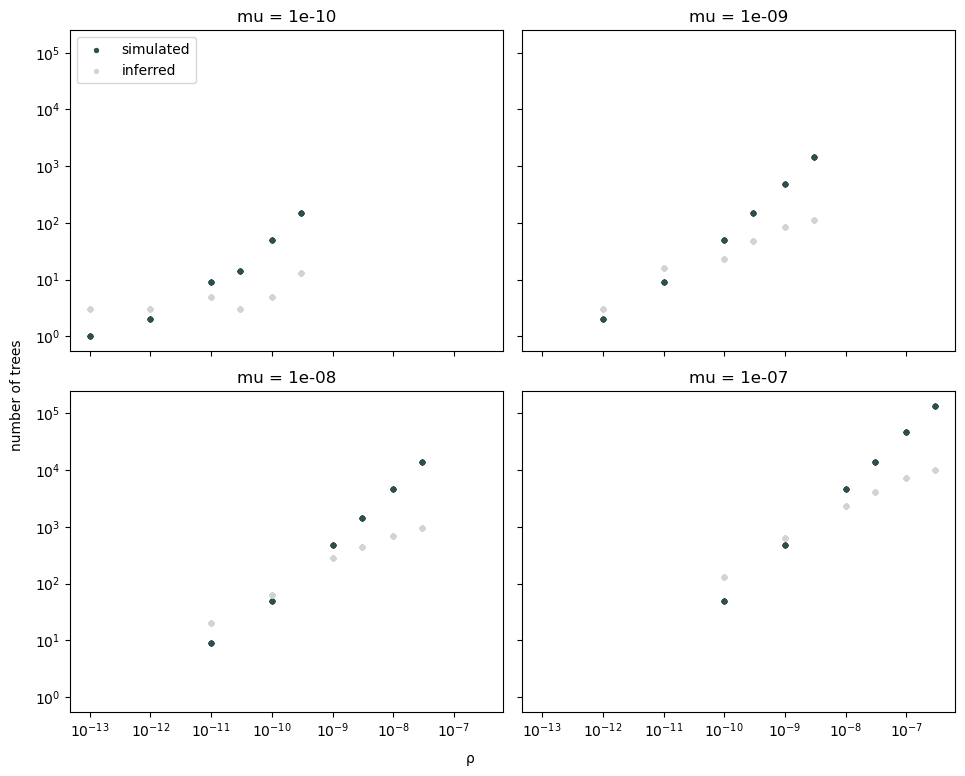

In [18]:
mus = sorted(inf_all["mu"].unique())

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.flatten()

for ax, mu in zip(axes, mus):
    df_mu = inf_all[inf_all["mu"] == mu]

    ax.scatter(
        df_mu["rr"], df_mu["n_trees_sim"],
        alpha=1, c="darkslategrey", s=8, label="simulated"
    )
    ax.scatter(
        df_mu["rr"], df_mu["n_trees_inf"],
        alpha=1, c="lightgrey", s=8, label="inferred"
    )

    ax.set_xscale("log")
    plt.gca().xaxis.set_minor_locator(ticker.NullLocator())
    plt.yscale("log")
    plt.gca().yaxis.set_minor_locator(ticker.NullLocator())
    #ax.set_xlim(7e-14, 4e-8)
    #ax.set_ylim(-100, 5000)
    ax.set_title(f"mu = {mu}")

# shared labels
fig.text(0.5, 0.04, "ρ", ha="center")
fig.text(0.04, 0.5, "number of trees", va="center", rotation="vertical")

# single legend
axes[0].legend(loc="upper left")

plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show()


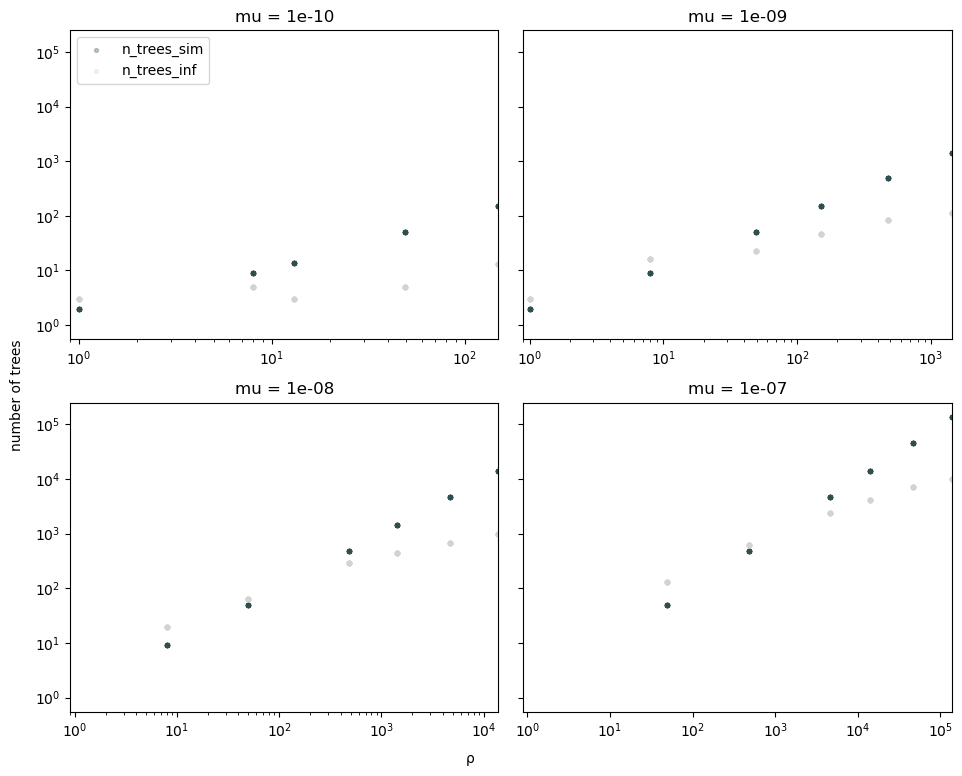

In [19]:
mus = sorted(inf_all["mu"].unique())

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=False, sharey=True)
axes = axes.flatten()

for ax, mu in zip(axes, mus):
    df_mu = inf_all[inf_all["mu"] == mu]

    ax.scatter(
        df_mu["avg_breakpoints"], df_mu["n_trees_sim"],
        alpha=0.3, c="darkslategrey", s=8, label="n_trees_sim"
    )
    ax.scatter(
        df_mu["avg_breakpoints"], df_mu["n_trees_inf"],
        alpha=0.3, c="lightgrey", s=8, label="n_trees_inf"
    )

    ax.set_xscale("log")
    plt.gca().xaxis.set_minor_locator(ticker.NullLocator())
    plt.yscale("log")
    plt.gca().yaxis.set_minor_locator(ticker.NullLocator())
    ax.set_xlim(0.9, df_mu["avg_breakpoints"].max())
    #ax.set_ylim(-100, 5000)
    ax.set_title(f"mu = {mu}")

# shared labels
fig.text(0.5, 0.04, "ρ", ha="center")
fig.text(0.04, 0.5, "number of trees", va="center", rotation="vertical")

# single legend
axes[0].legend(loc="upper left")

plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show()


In [20]:
# rr_vals = tree_counts.index.get_level_values("rr").values
# bp_vals = tree_counts["expected_breakpoints"].values

### plot

In [21]:
null_s = null_all
inf_s = inf_all

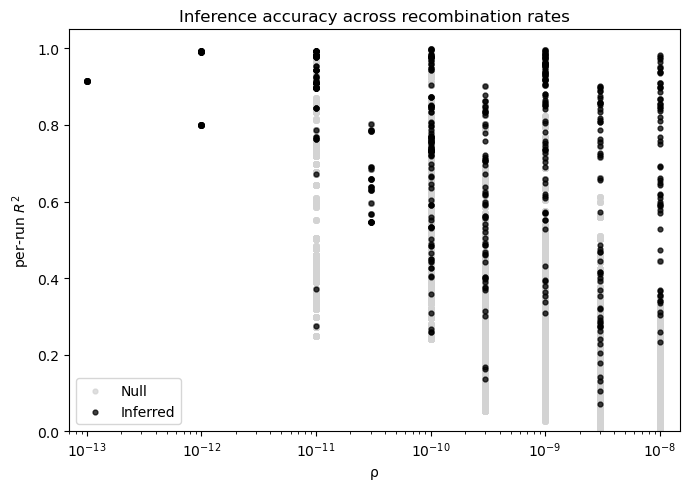

In [22]:
plt.figure(figsize=(7,5))

# plot nulls 
if len(null_all):
    plt.scatter(
        null_s["rr"], null_s["r2"],
        s=12, alpha=0.75, c="lightgrey", label="Null"
    )

# plot inferred results colored by rr (or rr_hat)
if len(inf_all):
    sc = plt.scatter(
        inf_s["rr"], inf_s["r2"],
        #cmap=cmap,
        s=12, alpha=0.75, label="Inferred", c = 'black'
    )
    #plt.colorbar(sc, label="p/m")

plt.xlim(7e-14, 1.5e-8)
plt.xscale("log") 
plt.ylim(0,1.05)

#axis w/ expected breakpoints
rr_vals = tree_counts.index.get_level_values("rr").values
bp_vals = tree_counts["expected_breakpoints"].values

plt.xlabel("ρ")
plt.ylabel("per-run $R^2$")
plt.title("Inference accuracy across recombination rates")
plt.legend(frameon=True, loc="lower left")
plt.tight_layout()

#plt.savefig("mu_scatter_2.png") 
plt.show()

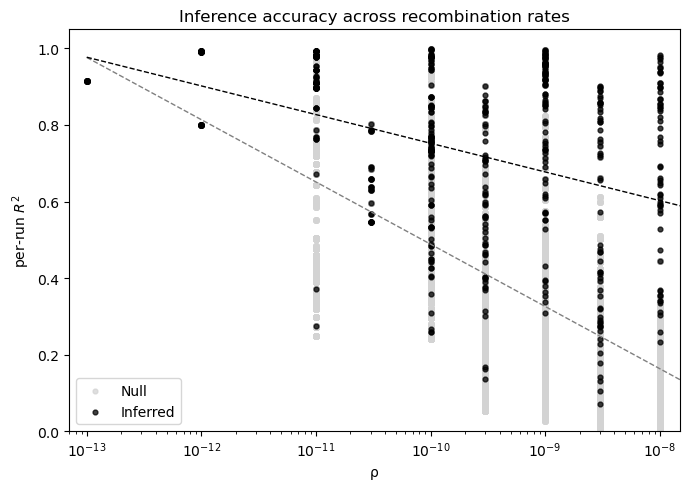

In [23]:
plt.figure(figsize=(7,5))

# plot nulls 
if len(null_all):
    plt.scatter(
        null_s["rr"], null_s["r2"],
        s=12, alpha=0.75, c="lightgrey", label="Null"
    )
    m, b = np.polyfit(np.log(null_s["rr"]), null_s["r2"], 1)
    log_x_regression = np.linspace(min(np.log(null_s["rr"])), max(np.log(null_s["rr"])), 100)
    y_regression = m * log_x_regression + b
    plt.plot(np.exp(log_x_regression), y_regression, color='grey', linestyle='--', lw = 1)

# plot inferred results colored by rr (or rr_hat)
if len(inf_all):
    sc = plt.scatter(
        inf_s["rr"], inf_s["r2"],
        #cmap=cmap,
        s=12, alpha=0.75, label="Inferred", c = 'black'
    )
    m, b = np.polyfit(np.log(inf_s["rr"]), inf_s["r2"], 1)
    log_x_regression = np.linspace(min(np.log(inf_s["rr"])), max(np.log(inf_s["rr"])), 100)
    y_regression = m * log_x_regression + b
    plt.plot(np.exp(log_x_regression), y_regression, color='black', linestyle='--', lw = 1)
    #plt.colorbar(sc, label="p/m")

plt.xlim(7e-14, 1.5e-8)
plt.xscale("log") 
plt.ylim(0,1.05)
plt.xlabel("ρ")
plt.ylabel("per-run $R^2$")
plt.title("Inference accuracy across recombination rates")
plt.legend(frameon=True, loc="lower left")
plt.tight_layout()
#plt.savefig("mu_scatter_2.png") 
plt.show()

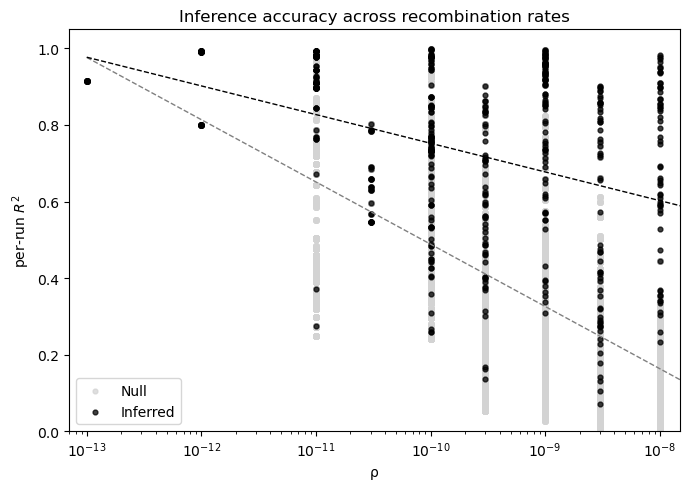

In [24]:
plt.figure(figsize=(7,5))

# plot nulls 
if len(null_all):
    plt.scatter(
        null_s["rr"], null_s["r2"],
        s=12, alpha=0.75, c="lightgrey", label="Null"
    )
    m, b = np.polyfit(np.log(null_s["rr"]), null_s["r2"], 1)
    log_x_regression = np.linspace(min(np.log(null_s["rr"])), max(np.log(null_s["rr"])), 100)
    y_regression = m * log_x_regression + b
    plt.plot(np.exp(log_x_regression), y_regression, color='grey', linestyle='--', lw = 1)

# plot inf colored by rr
if len(inf_all):
    sc = plt.scatter(
        inf_s["rr"], inf_s["r2"],
        #cmap=cmap,
        s=12, alpha=0.75, label="Inferred", c = 'black'
    )
    m, b = np.polyfit(np.log(inf_s["rr"]), inf_s["r2"], 1)
    log_x_regression = np.linspace(min(np.log(inf_s["rr"])), max(np.log(inf_s["rr"])), 100)
    y_regression = m * log_x_regression + b
    plt.plot(np.exp(log_x_regression), y_regression, color='black', linestyle='--', lw = 1)
    #plt.colorbar(sc, label="p/m")

plt.xlim(7e-14, 1.5e-8)
plt.xscale("log") 
plt.ylim(0,1.05)
plt.xlabel("ρ")
plt.ylabel("per-run $R^2$")
plt.title("Inference accuracy across recombination rates")
plt.legend(frameon=True, loc="lower left")
plt.tight_layout()
#plt.savefig("mu_scatter_2.png") 
plt.show()

## plot medians

In [25]:
inf_s

,mu,pm,rr,rep,bin,r2,kind,n_trees_sim,n_trees_inf,breakpoints_sim,breakpoints_inf,avg_breakpoints
0,1.000000e-10,0.001,1.000000e-13,0,1,0.915093,inferred,1,3,0,2,0.0
1,1.000000e-10,0.001,1.000000e-13,0,2,0.915093,inferred,1,3,0,2,0.0
2,1.000000e-10,0.001,1.000000e-13,0,3,0.915093,inferred,1,3,0,2,0.0
3,1.000000e-10,0.001,1.000000e-13,0,4,0.915093,inferred,1,3,0,2,0.0
4,1.000000e-10,0.001,1.000000e-13,0,5,0.915093,inferred,1,3,0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
690,1.000000e-07,3.000,3.000000e-07,0,25,0.376952,inferred,137234,9914,137233,9913,137233.0
691,1.000000e-07,3.000,3.000000e-07,0,26,0.450914,inferred,137234,9914,137233,9913,137233.0
692,1.000000e-07,3.000,3.000000e-07,0,27,0.388364,inferred,137234,9914,137233,9913,137233.0
693,1.000000e-07,3.000,3.000000e-07,0,28,0.277969,inferred,137234,9914,137233,9913,137233.0


In [26]:
# metric (mean, median) per-REP! 5 medians per p-m  

inf_s['median_r2'] = inf_all.groupby(['rr', 'mu', 'rep', 'pm'])['r2'].transform('median')
inf_s['mean_r2'] = inf_all.groupby(['rr', 'mu', 'rep', 'pm'])['r2'].transform('mean')
null_s['median_r2'] = null_all.groupby(['rr', 'mu', 'rep', 'pm'])['r2'].transform('median')
null_s['mean_r2'] = null_all.groupby(['rr', 'mu', 'rep', 'pm'])['r2'].transform('mean')

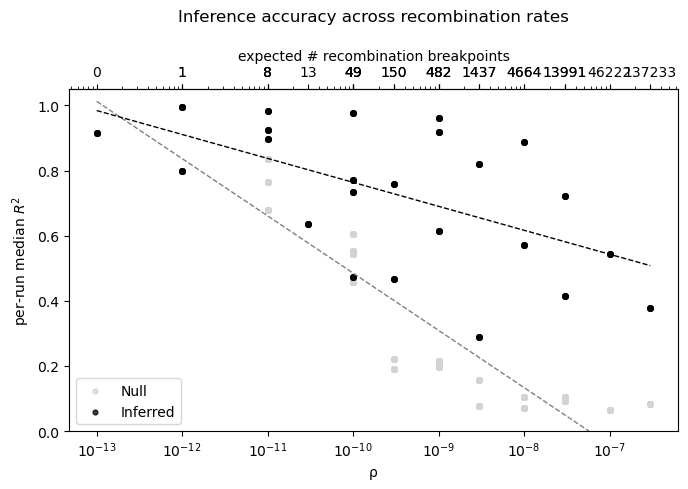

In [27]:
fig, ax = plt.subplots(figsize=(7,5))

# plot nulls 
if len(null_all):
    ax.scatter(
        null_s["rr"], null_s["median_r2"],
        s=12, alpha=0.75, c="lightgrey", label="Null"
    )
    m, b = np.polyfit(np.log(null_s["rr"]), null_s["median_r2"], 1)
    log_x_regression = np.linspace(min(np.log(null_s["rr"])), max(np.log(null_s["rr"])), 100)
    y_regression = m * log_x_regression + b
    plt.plot(np.exp(log_x_regression), y_regression, color='grey', linestyle='--', lw = 1)

# plot inferred results
if len(inf_all):
    ax.scatter(
        inf_s["rr"], inf_s["median_r2"],
        s=12, alpha=0.75, label="Inferred", c='black'
    )
    m, b = np.polyfit(np.log(inf_s["rr"]), inf_s["median_r2"], 1)
    log_x_regression = np.linspace(min(np.log(inf_s["rr"])), max(np.log(inf_s["rr"])), 100)
    y_regression = m * log_x_regression + b
    plt.plot(np.exp(log_x_regression), y_regression, color='black', linestyle='--', lw = 1)

# main x axis settings
ax.set_xscale("log")
plt.gca().xaxis.set_minor_locator(ticker.NullLocator())
#ax.set_xlim(7e-14, 1.5e-8)
ax.set_ylim(0, 1.05)

# secondary x axis w/ expected breakpoints -----
rr_vals = tree_counts.index.get_level_values("rr").values
bp_vals = tree_counts["expected_breakpoints"].values

secax = ax.secondary_xaxis("top")
secax.set_xticks(rr_vals)
secax.set_xticklabels([f"{bp:.0f}" for bp in bp_vals])
secax.set_xlabel("expected # recombination breakpoints")

# labels / title / legend
ax.set_xlabel("ρ")
ax.set_ylabel("per-run median $R^2$")
ax.set_title("Inference accuracy across recombination rates", fontsize=12, pad=20)
ax.legend(frameon=True, loc="lower left")

fig.tight_layout()
plt.show()

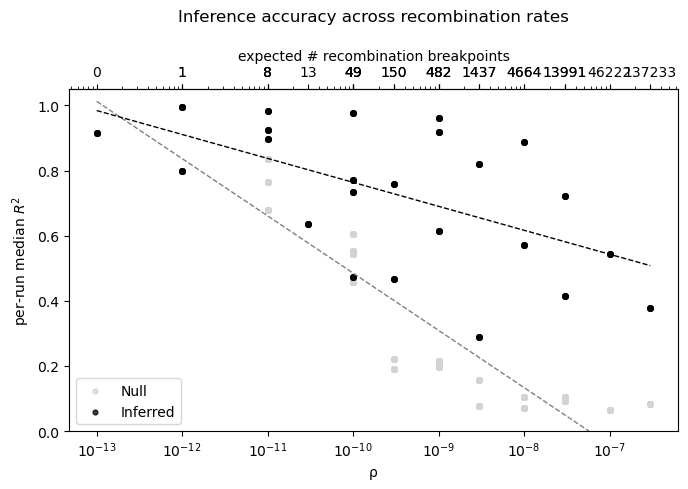

In [28]:
fig, ax = plt.subplots(figsize=(7,5))

# plot nulls 
if len(null_all):
    ax.scatter(
        null_s["rr"], null_s["median_r2"],
        s=12, alpha=0.75, c="lightgrey", label="Null"
    )
    m, b = np.polyfit(np.log(null_s["rr"]), null_s["median_r2"], 1)
    log_x_regression = np.linspace(min(np.log(null_s["rr"])), max(np.log(null_s["rr"])), 100)
    y_regression = m * log_x_regression + b
    plt.plot(np.exp(log_x_regression), y_regression, color='grey', linestyle='--', lw = 1)

# plot inferred results
if len(inf_all):
    ax.scatter(
        inf_s["rr"], inf_s["median_r2"],
        s=12, alpha=0.75, label="Inferred", c='black'
    )
    m, b = np.polyfit(np.log(inf_s["rr"]), inf_s["median_r2"], 1)
    log_x_regression = np.linspace(min(np.log(inf_s["rr"])), max(np.log(inf_s["rr"])), 100)
    y_regression = m * log_x_regression + b
    plt.plot(np.exp(log_x_regression), y_regression, color='black', linestyle='--', lw = 1)

# main x axis settings
ax.set_xscale("log")
plt.gca().xaxis.set_minor_locator(ticker.NullLocator())
#ax.set_xlim(7e-14, 1.5e-8)
ax.set_ylim(0, 1.05)

# secondary x axis w/ expected breakpoints -----
rr_vals = tree_counts.index.get_level_values("rr").values
bp_vals = tree_counts["expected_breakpoints"].values

secax = ax.secondary_xaxis("top")
secax.set_xticks(rr_vals)
secax.set_xticklabels([f"{bp:.0f}" for bp in bp_vals])
secax.set_xlabel("expected # recombination breakpoints")

# labels / title / legend
ax.set_xlabel("ρ")
ax.set_ylabel("per-run median $R^2$")
ax.set_title("Inference accuracy across recombination rates", fontsize=12, pad=20)
ax.legend(frameon=True, loc="lower left")

fig.tight_layout()
plt.show()

### plotting expected # breakpoints vs detectable # breakpoints (by mutation rate)

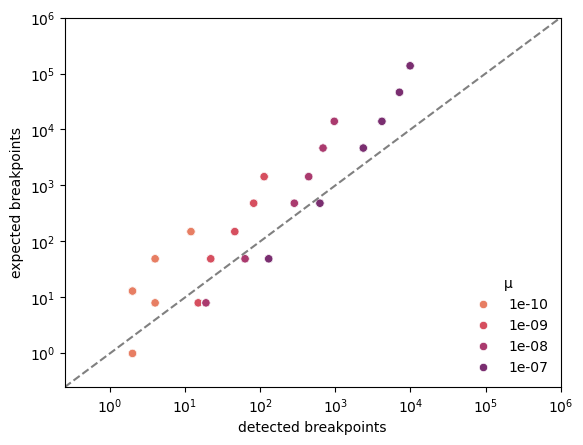

In [29]:
# y axis: expected number --  breakpoints_sim
# x axis: detectable number (color by mu) breakpoints_inf 

# bkpts = inf_all[


# plt.figure()
# plt.scatter(inf_all["breakpoints_sim"], inf_all["breakpoints_inf"], alpha = 0.5, c = 'darkslategrey', s = 8)
# plt.scatter(inf_all["rr"], inf_all["n_trees_inf"]-1, label="n_trees_inf", alpha = 0.5, c = 'lightgrey', s =8)

# plt.xlabel("ρ")
# plt.ylabel("number of trees")


# #plt.xlim(7e-14, 4e-8)
# plt.xscale("log") 
# plt.yscale("log")

# #plt.ylim(-100, )

# plt.legend(loc = 'upper left')
# plt.savefig("trees_by_rho.png") 
# plt.show()

bp_colors = sns.color_palette("flare", 4)

sns.scatterplot(data=inf_all, x='breakpoints_inf', y='breakpoints_sim', hue='mu', palette=bp_colors)
plt.axline([0, 0], slope=1, color='grey', linestyle='--')
plt.yscale('log')
plt.gca().yaxis.set_minor_locator(ticker.NullLocator())
plt.xscale('log')
plt.gca().xaxis.set_minor_locator(ticker.NullLocator())
plt.xlim(0.250, 10e5)
plt.ylim(0.250, 10e5)
plt.ylabel("expected breakpoints")
plt.xlabel("detected breakpoints")
plt.legend(title="μ", loc = 'lower right', frameon = False)
#plt.savefig("bp_detection_scatter.png")

plt.show()




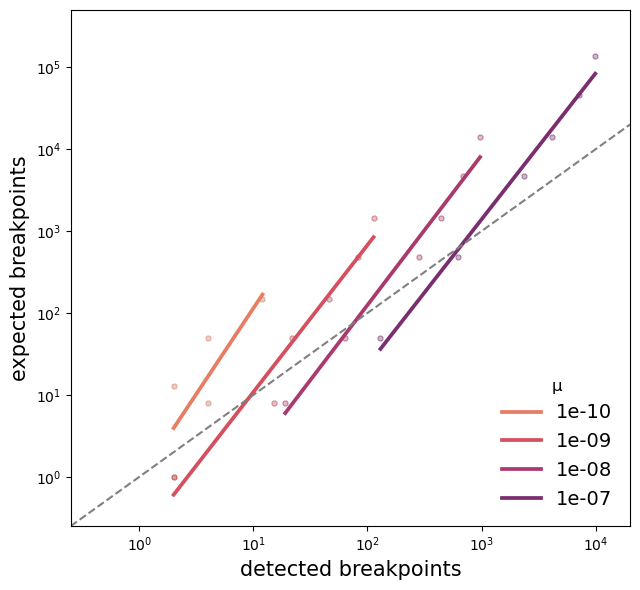

In [162]:
df = inf_all.copy()

mu_values = sorted(df["mu"].unique())

bp_colors = sns.color_palette("flare", len(mu_values))

plt.figure(figsize=(6.5, 6))

# points + trend lines by mu 
for mu, color in zip(mu_values, bp_colors):
    sub = df[df["mu"] == mu]
    if len(sub) == 0:
        continue

    # points (low alpha)
    plt.scatter(
        sub["breakpoints_inf"],
        sub["breakpoints_sim"],
        s=14,
        alpha=0.01,
        color=color
    )

    # trend line 
    if len(sub) >= 2:
        # only pos values for log scale 
        sub_fit = sub[(sub["breakpoints_inf"] > 0) & (sub["breakpoints_sim"] > 0)]
        if len(sub_fit) >= 2:
            lx = np.log10(sub_fit["breakpoints_inf"].to_numpy())
            ly = np.log10(sub_fit["breakpoints_sim"].to_numpy())
    
            m, b = np.polyfit(lx, ly, 1)
    
            xline = np.logspace(lx.min(), lx.max(), 200)
            yline = 10 ** (m * np.log10(xline) + b)
    
            plt.plot(xline, yline, lw=2.7, color=color, label=f"{mu:g}")

# y = x
plt.axline([1, 1], slope=1, color="grey", linestyle="--")

# fmt
plt.xscale("log")
plt.yscale("log")
plt.gca().xaxis.set_minor_locator(ticker.NullLocator())
plt.gca().yaxis.set_minor_locator(ticker.NullLocator())

plt.xlim(0.250, 2e4)
plt.ylim(0.250, 5e5)

plt.xlabel("detected breakpoints", fontsize=15)
plt.ylabel("expected breakpoints", fontsize=15)
plt.legend(title="μ", loc = 'lower right', frameon = False, fontsize=14, title_fontsize = 12)
plt.tight_layout()
#plt.savefig("bp_detection_trends.png")
plt.show()


In [31]:
inf_all['rr'].unique()

array([1.e-13, 1.e-12, 1.e-12, 1.e-11, 3.e-11, 1.e-10, 1.e-10, 3.e-10,
       1.e-09, 3.e-09, 1.e-08, 3.e-08, 3.e-08, 1.e-07, 3.e-07])

### color by pm

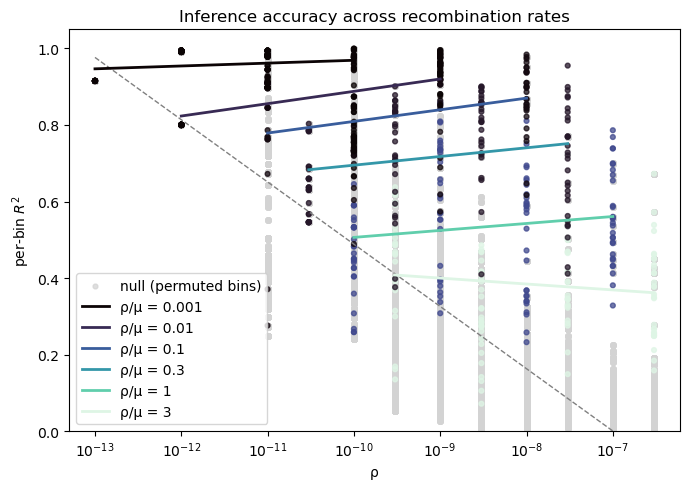

In [32]:
plt.figure(figsize=(7,5))

# colormap for different pm values 
cmap = plt.get_cmap("mako")
pm_values = [0.001, 0.01, 0.1, 0.3, 1.0, 3.0]
colors = cmap(np.linspace(0, 1, len(pm_values)))

# null pts
if len(null_all):
    plt.scatter(
        null_s["rr"], null_s["r2"],
        s=12, alpha=0.75, c="lightgrey", label="null (permuted bins)"
    )
    m, b = np.polyfit(np.log(null_s["rr"]), null_s["r2"], 1)
    log_x = np.linspace(min(np.log(null_s["rr"])), max(np.log(null_s["rr"])), 100)
    plt.plot(np.exp(log_x), m * log_x + b, color="grey", linestyle="--", lw=1)

# inf pts (colored by pm) 
if len(inf_all):
    sc = plt.scatter(
        inf_s["rr"],
        inf_s["r2"],
        c=inf_s["pm"],
        cmap=cmap,
        s=12,
        alpha=0.75
    )
    #cbar = plt.colorbar(sc, label="p/m")

    # regression lines per pm
    for pm, color in zip(pm_values, colors):
        subset = inf_s[inf_s["pm"] == pm]
        if len(subset) < 2:
            continue

        m, b = np.polyfit(np.log(subset["rr"]), subset["r2"], 1)
        log_x = np.linspace(
            min(np.log(subset["rr"])),
            max(np.log(subset["rr"])),
            200
        )
        y = m * log_x + b

        plt.plot(
            np.exp(log_x), y,
            color=color,
            lw=2,
            label=f"ρ/μ = {pm:g}"
        )


# axes / labels
plt.xscale("log")
plt.gca().xaxis.set_minor_locator(ticker.NullLocator())
#plt.xlim(7e-14, 1.5e-8)
plt.xlim(inf_s["rr"].min() - inf_s["rr"].min()*0.5 , inf_s["rr"].max() + inf_s["rr"].max()*1)



plt.ylim(0, 1.05)
plt.xlabel("ρ")
plt.ylabel("per-bin $R^2$")
plt.title("Inference accuracy across recombination rates")
plt.legend(frameon=True, loc="lower left")
plt.tight_layout()
#plt.savefig("rr_accuracy.png")
plt.show()



### facet

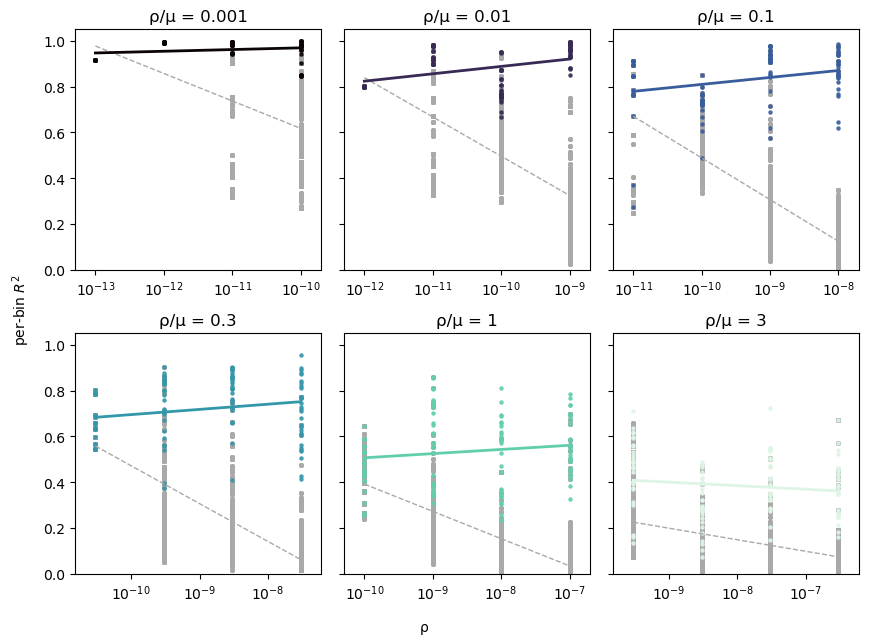

In [33]:
# colormap for different pm values 
cmap = plt.get_cmap("mako")
pm_values = [0.001, 0.01, 0.1, 0.3, 1.0, 3.0]
colors = cmap(np.linspace(0, 1, len(pm_values)))

xlims = [(7e-14, 5e-6)] * len(pm_values)

fig, axes = plt.subplots(2, 3, figsize=(9, 7), sharex=False, sharey=True)

for ax, pm, color, xlim in zip(axes.flatten(), pm_values, colors, xlims):

    # subset by pm (inf)
    inf_sub = inf_s[inf_s["pm"] == pm]

    # subset by pm (null)
    null_sub = null_s[null_s["pm"] == pm] 

    # plot null
    if len(null_sub):
        ax.scatter(
            null_sub["rr"], null_sub["r2"],
            s=5, alpha=0.75, color="darkgrey", label="null"
        )
        if len(null_sub) >= 2:
            m_null, b_null = np.polyfit(np.log(null_sub["rr"]), null_sub["r2"], 1)
            log_x_null = np.linspace(np.log(null_sub["rr"]).min(),
                                     np.log(null_sub["rr"]).max(), 200)
            ax.plot(np.exp(log_x_null),
                    m_null * log_x_null + b_null,
                    color="darkgrey", linestyle="--", lw=1)

    # plot inf
    if len(inf_sub):
        ax.scatter(
            inf_sub["rr"], inf_sub["r2"],
            s=5, alpha=0.85, color=color, label="inferred"
        )
        if len(inf_sub) >= 2:
            m_inf, b_inf = np.polyfit(np.log(inf_sub["rr"]), inf_sub["r2"], 1)
            log_x_inf = np.linspace(np.log(inf_sub["rr"]).min(),
                                    np.log(inf_sub["rr"]).max(), 200)
            ax.plot(np.exp(log_x_inf),
                    m_inf * log_x_inf + b_inf,
                    color=color, lw=2, label="fit")

        # x-lims for log scale 
        xmin = inf_sub["rr"].min()
        xmax = inf_sub["rr"].max()
        ax.set_xlim(xmin * 0.5, xmax * 2.0)

    else:
        ax.set_xlim(xlim)

    # fmt
    ax.set_xscale("log")
    ax.xaxis.set_minor_locator(ticker.NullLocator())
    ax.set_ylim(0, 1.05)
    ax.set_title(f"ρ/μ = {pm:g}")

# shared labels
fig.text(0.5, 0.04, "ρ", ha="center")
fig.text(0.04, 0.5, "per-bin $R^2$", va="center", rotation="vertical")

plt.tight_layout(rect=[0.06, 0.06, 1, 0.95])

#plt.savefig("rr_accuracy_facet.png")

plt.show()


## medians r2 per-rep

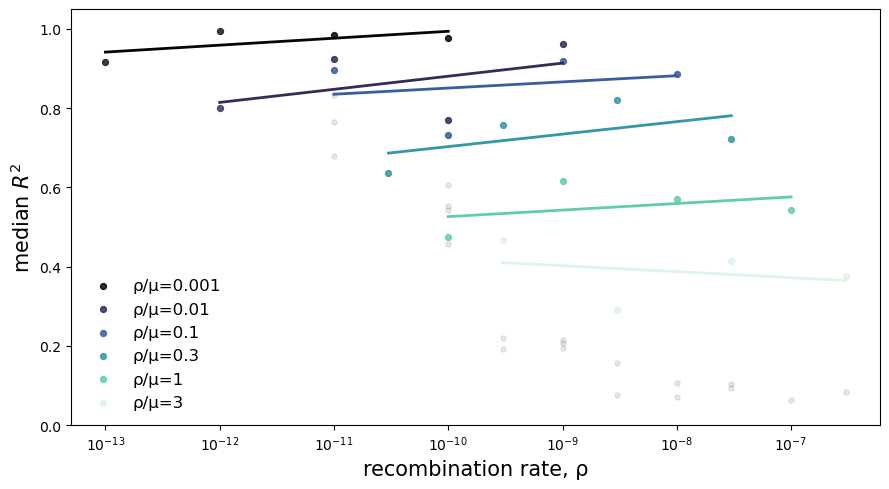

In [154]:
fig, ax = plt.subplots(figsize=(9, 5))

# colormap for different pm values
cmap = plt.get_cmap("mako")
pm_values = [0.001, 0.01, 0.1, 0.3, 1.0, 3.0]
colors = cmap(np.linspace(0, 1, len(pm_values)))

# aggregate so theres 1 row per (pm, rr) combo
inf_fit = (inf_s.groupby(["pm", "rr"], as_index=False).agg(median_r2=("median_r2", "median")))

null_fit = (null_s.groupby(["pm", "rr"], as_index=False).agg(median_r2=("median_r2", "median")))

# plot per pm 
for pm, color in zip(pm_values, colors):
    # inferred
    sub_i = inf_fit[np.isclose(inf_fit["pm"], pm)]
    if len(sub_i):
        ax.scatter(
            sub_i["rr"], sub_i["median_r2"],
            s=18, alpha=0.85, color=color,
            label=f"ρ/μ={pm:g}"
        )
        if len(sub_i) >= 2:
            lx = np.log(sub_i["rr"].to_numpy())
            y = sub_i["median_r2"].to_numpy()
            m, b = np.polyfit(lx, y, 1)
            log_x = np.linspace(lx.min(), lx.max(), 200)
            ax.plot(np.exp(log_x), m * log_x + b, color=color, lw=2)

    # null (same color, lower alpha)
    sub_n = null_fit[np.isclose(null_fit["pm"], pm)]
    if len(sub_n):
        ax.scatter(
            sub_n["rr"], sub_n["median_r2"],
            s=14, alpha=0.18, color='grey'#,
           # label=f"null ρ/μ={pm:g}"
        )

    # if len(null_all):
    #     ax.scatter(
    #         null_s["rr"], null_s["median_r2"],
    #         s=12, alpha=0.75, c="lightgrey", label="null (permuted bins)"
    #     )
        # if len(sub_n) >= 2:
        #     lx = np.log(sub_n["rr"].to_numpy())
        #     y = sub_n["median_r2"].to_numpy()
        #     m, b = np.polyfit(lx, y, 1)
        #     log_x = np.linspace(lx.min(), lx.max(), 200)
        #     ax.plot(np.exp(log_x), m * log_x + b, color=color, lw=1, ls="--", alpha=0.35)

# fmt axes
ax.set_xscale("log")
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.set_ylim(0, 1.05)

# x limits from inferred, else use null
all_rr = inf_fit["rr"] if len(inf_fit) else null_fit["rr"]
ax.set_xlim(all_rr.min() * 0.5, all_rr.max() * 2.0)

ax.set_xlabel("recombination rate, ρ", fontsize=15)
ax.set_ylabel("median $R^2$", fontsize=15)


ax.legend(frameon=False, fontsize=12, loc="lower left", ncol=1)

fig.tight_layout()
#plt.savefig("rr_accuracy_single_bp_wide.png")
plt.show()


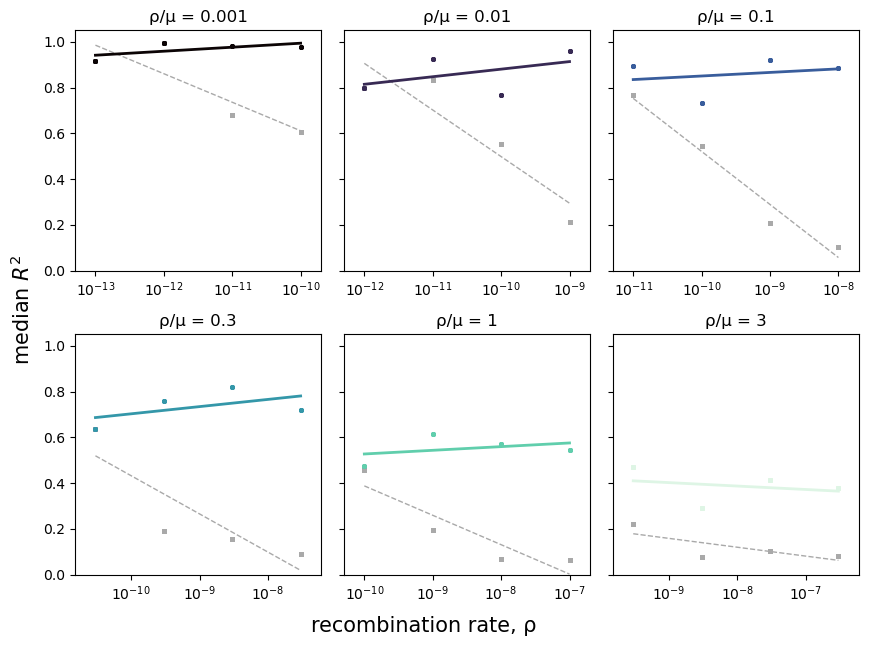

In [153]:
xlims = [(7e-14, 5e-6)] * len(pm_values)

fig, axes = plt.subplots(2, 3, figsize=(9, 7), sharex=False, sharey=True)

for ax, pm, color, xlim in zip(axes.flatten(), pm_values, colors, xlims):

    # subset by category (inf/null) 
    inf_sub = inf_s[inf_s["pm"] == pm]
    null_sub = null_s[null_s["pm"] == pm]

    # plot null
    if len(null_sub):
        ax.scatter(
            null_sub["rr"], null_sub["median_r2"],
            s=5, alpha=0.75, color="darkgrey", label="null"
        )
        if len(null_sub) >= 2:
            m_null, b_null = np.polyfit(np.log(null_sub["rr"]), null_sub["median_r2"], 1)
            log_x_null = np.linspace(
                np.log(null_sub["rr"]).min(),
                np.log(null_sub["rr"]).max(),
                200
            )
            ax.plot(
                np.exp(log_x_null),
                m_null * log_x_null + b_null,
                color="darkgrey", linestyle="--", lw=1
            )

    # plot inf
    if len(inf_sub):
        ax.scatter(
            inf_sub["rr"], inf_sub["median_r2"],
            s=5, alpha=0.85, color=color, label="inferred"
        )
        if len(inf_sub) >= 2:
            m_inf, b_inf = np.polyfit(np.log(inf_sub["rr"]), inf_sub["median_r2"], 1)
            log_x_inf = np.linspace(
                np.log(inf_sub["rr"]).min(),
                np.log(inf_sub["rr"]).max(),
                200
            )
            ax.plot(
                np.exp(log_x_inf),
                m_inf * log_x_inf + b_inf,
                color=color, lw=2, label="fit"
            )

        # x lims
        xmin = inf_sub["rr"].min()
        xmax = inf_sub["rr"].max()
        ax.set_xlim(xmin * 0.5, xmax * 2.0)

    else:
        ax.set_xlim(xlim)

    # fmt
    ax.set_xscale("log")
    ax.xaxis.set_minor_locator(ticker.NullLocator())
    ax.set_ylim(0, 1.05)
    ax.set_title(f"ρ/μ = {pm:g}")
    # ax.legend(frameon=True, fontsize=8, loc="lower left")

# shared labels
fig.text(0.5, 0.04, "recombination rate, ρ", ha="center", fontsize=15)
fig.text(0.04, 0.5, "median $R^2$", va="center", rotation="vertical", fontsize=15)
#fig.text(0.5, 1.0, "single rep")


plt.tight_layout(rect=[0.06, 0.06, 1, 0.95])

#plt.savefig("median_rr_accuracy_facet_single.png")
plt.show()


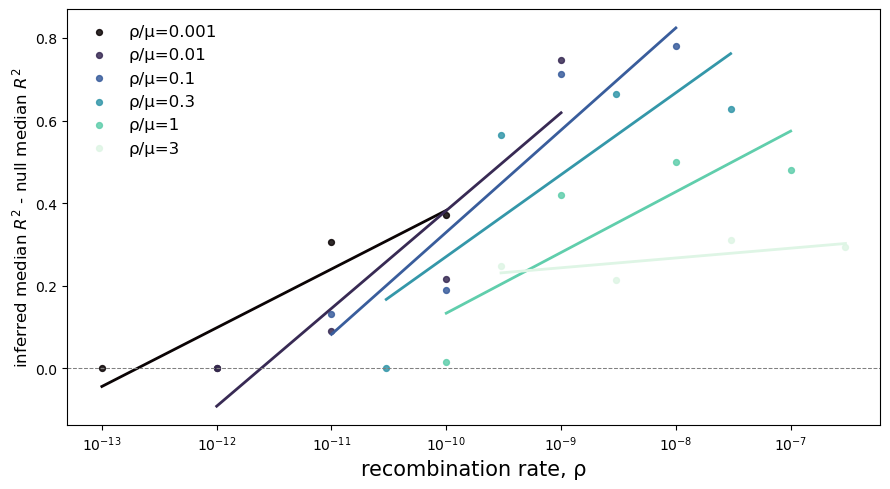

In [152]:
fig, ax = plt.subplots(figsize=(9, 5))

# colormap for different pm values
cmap = plt.get_cmap("mako")
pm_values = [0.001, 0.01, 0.1, 0.3, 1.0, 3.0]
colors = cmap(np.linspace(0, 1, len(pm_values)))

# aggregate so theres 1 row per (pm, rr) combo
inf_fit = (inf_s.groupby(["pm", "rr"], as_index=False).agg(median_r2=("median_r2", "median")))

null_fit = (null_s.groupby(["pm", "rr"], as_index=False).agg(median_r2=("median_r2", "median")))

inf_fit['delta'] = inf_fit['median_r2'] - null_fit['median_r2'] 

# plot per pm 
for pm, color in zip(pm_values, colors):
    # inferred
    sub_i = inf_fit[np.isclose(inf_fit["pm"], pm)]
    if len(sub_i):
        ax.scatter(
            sub_i["rr"], sub_i["delta"],
            s=18, alpha=0.85, color=color,
            label=f"ρ/μ={pm:g}"
        )
        if len(sub_i) >= 2:
            lx = np.log(sub_i["rr"].to_numpy())
            y = sub_i["delta"].to_numpy()
            m, b = np.polyfit(lx, y, 1)
            log_x = np.linspace(lx.min(), lx.max(), 200)
            ax.plot(np.exp(log_x), m * log_x + b, color=color, lw=2)

    # # null (same color, lower alpha)
    # sub_n = null_fit[np.isclose(null_fit["pm"], pm)]
    # if len(sub_n):
    #     ax.scatter(
    #         sub_n["rr"], sub_n["median_r2"],
    #         s=14, alpha=0.18, color='grey'#,
    #        # label=f"null ρ/μ={pm:g}"
    #     )

    # if len(null_all):
    #     ax.scatter(
    #         null_s["rr"], null_s["median_r2"],
    #         s=12, alpha=0.75, c="lightgrey", label="null (permuted bins)"
    #     )
        # if len(sub_n) >= 2:
        #     lx = np.log(sub_n["rr"].to_numpy())
        #     y = sub_n["median_r2"].to_numpy()
        #     m, b = np.polyfit(lx, y, 1)
        #     log_x = np.linspace(lx.min(), lx.max(), 200)
        #     ax.plot(np.exp(log_x), m * log_x + b, color=color, lw=1, ls="--", alpha=0.35)

plt.axhline(0, color = 'grey', lw = .75, ls='--')

# fmt axes
ax.set_xscale("log")
ax.xaxis.set_minor_locator(ticker.NullLocator())
#ax.set_ylim(0, 1.05)

# x limits from inferred, else use null
all_rr = inf_fit["rr"] if len(inf_fit) else null_fit["rr"]
ax.set_xlim(all_rr.min() * 0.5, all_rr.max() * 2.0)

ax.set_xlabel("recombination rate, ρ", fontsize=15)
ax.set_ylabel("inferred median $R^2$ - null median $R^2$", fontsize=12)


ax.legend(frameon=False, fontsize=12, loc="upper left", ncol=1)

fig.tight_layout()
#plt.savefig("delta_median_r2.png")
plt.show()


# find a way to get uncertainties for the r2 improvement -- instead of finding the difference between inferred r2 and null r2, 

Compute the R2 difference across runs as you mention (which would have the positive side of enabling you to provide a point estimate and uncertainty around your improvement). So maybe you could conclude to “no significant improvement” if overall the range of R2 difference crosses 0.

#### trying to shift x axis to num_expected_bps

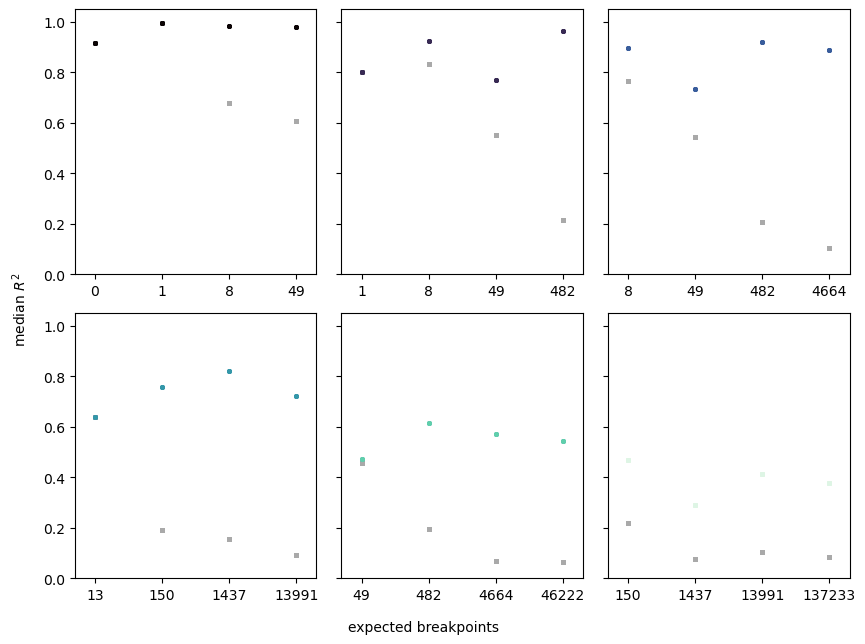

In [40]:
xlims = [(7e-14, 5e-6)] * len(pm_values)

fig, axes = plt.subplots(2, 3, figsize=(9, 7), sharex=False, sharey=True)

for ax, pm, color, xlim in zip(axes.flatten(), pm_values, colors, xlims):

    # subset
    inf_sub = inf_s[inf_s["pm"] == pm].copy()
    null_sub = null_s[null_s["pm"] == pm].copy()

    # discrete mapping b/w rr and avg_breakpoints 
    bp_map = (
        inf_sub[["rr", "avg_breakpoints"]]
        .dropna()
        .drop_duplicates(subset=["rr"])
        .sort_values("rr")
    )
    rr_ticks = bp_map["rr"].to_numpy()
    bp_labels = bp_map["avg_breakpoints"].to_numpy()

    # null points
    if len(null_sub):
        ax.scatter(
            null_sub["rr"], null_sub["median_r2"],
            s=5, alpha=0.75, color="darkgrey", label="null"
        )

    # inf points 
    
    if len(inf_sub):
        ax.scatter(
            inf_sub["rr"], inf_sub["median_r2"],
            s=5, alpha=0.85, color=color, label="inferred"
        )

        # x lims based on inferred rr range
        xmin = inf_sub["rr"].min()
        xmax = inf_sub["rr"].max()
        ax.set_xlim(xmin * 0.5, xmax * 2.0)
    else:
        ax.set_xlim(xlim)

    # x axis showing just discrete breakpoints 
    ax.set_xscale("log")
    ax.xaxis.set_minor_locator(ticker.NullLocator())

    if len(rr_ticks):
        max_labels = 5  # tweak for clutter
        if len(rr_ticks) > max_labels:
            keep = np.linspace(0, len(rr_ticks) - 1, max_labels, dtype=int)
            rr_ticks_show = rr_ticks[keep]
            bp_labels_show = bp_labels[keep]
        else:
            rr_ticks_show = rr_ticks
            bp_labels_show = bp_labels

        ax.set_xticks(rr_ticks_show)
        ax.set_xticklabels([f"{b:g}" for b in bp_labels_show])

    # y fmt
    ax.set_ylim(0, 1.05)

# shared labels
fig.text(0.5, 0.04, "expected breakpoints", ha="center")
fig.text(0.04, 0.5, "median $R^2$", va="center", rotation="vertical")

plt.tight_layout(rect=[0.06, 0.06, 1, 0.95])
# plt.savefig("median_rr_accuracy_facet_discrete_bp.png", dpi=300)
plt.show()


## means r2 per-rep

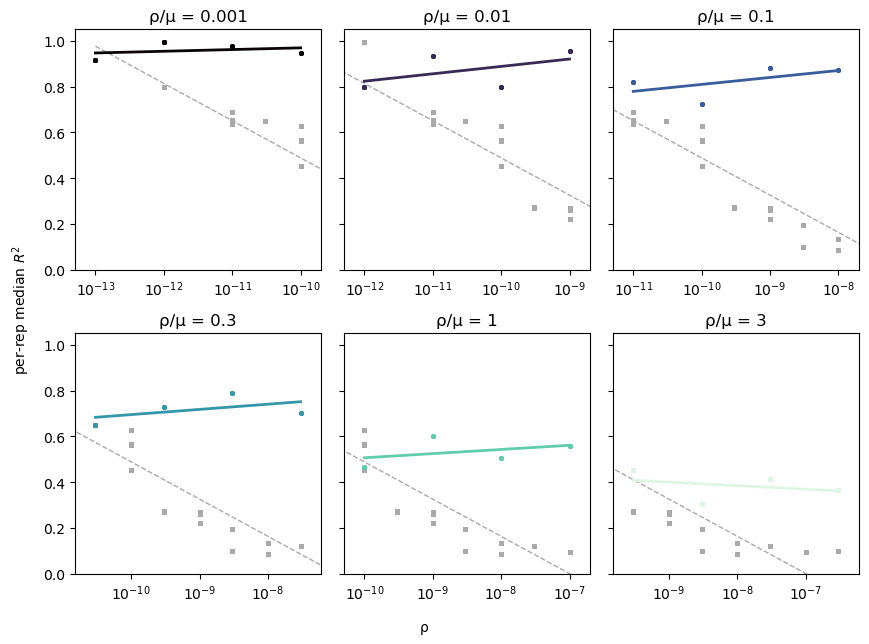

In [40]:
xlims = [(7e-14, 5e-6)] * len(pm_values)

fig, axes = plt.subplots(2, 3, figsize=(9, 7), sharex=False, sharey=True)

for ax, pm, color, xlim in zip(axes.flatten(), pm_values, colors, xlims):

    # subset by category (inf/null) 
    inf_sub = inf_s[inf_s["pm"] == pm]
    null_s[null_s["pm"] == pm]

    # plot null
    if len(null_sub):
        ax.scatter(
            null_sub["rr"], null_sub["mean_r2"],
            s=5, alpha=0.75, color="darkgrey", label="null"
        )
        if len(null_sub) >= 2:
            m_null, b_null = np.polyfit(np.log(null_sub["rr"]), null_sub["mean_r2"], 1)
            log_x_null = np.linspace(
                np.log(null_sub["rr"]).min(),
                np.log(null_sub["rr"]).max(),
                200
            )
            ax.plot(
                np.exp(log_x_null),
                m_null * log_x_null + b_null,
                color="darkgrey", linestyle="--", lw=1
            )

    # plot inf
    if len(inf_sub):
        ax.scatter(
            inf_sub["rr"], inf_sub["mean_r2"],
            s=5, alpha=0.85, color=color, label="inferred"
        )
        if len(inf_sub) >= 2:
            m_inf, b_inf = np.polyfit(np.log(inf_sub["rr"]), inf_sub["mean_r2"], 1)
            log_x_inf = np.linspace(
                np.log(inf_sub["rr"]).min(),
                np.log(inf_sub["rr"]).max(),
                200
            )
            ax.plot(
                np.exp(log_x_inf),
                m_inf * log_x_inf + b_inf,
                color=color, lw=2, label="fit"
            )

        # x lims
        xmin = inf_sub["rr"].min()
        xmax = inf_sub["rr"].max()
        ax.set_xlim(xmin * 0.5, xmax * 2.0)

    else:
        ax.set_xlim(xlim)

    # fmt
    ax.set_xscale("log")
    ax.xaxis.set_minor_locator(ticker.NullLocator())
    ax.set_ylim(0, 1.05)
    ax.set_title(f"ρ/μ = {pm:g}")
    # ax.legend(frameon=True, fontsize=8, loc="lower left")

# shared labels
fig.text(0.5, 0.04, "ρ", ha="center")
fig.text(0.04, 0.5, "per-rep median $R^2$", va="center", rotation="vertical")

plt.tight_layout(rect=[0.06, 0.06, 1, 0.95])

#plt.savefig("mean_rr_accuracy_facet.png")
plt.show()


# (C) Inference accuracy under fixed mutation rate and varying recombination rate. Points describing R2 values for null (permuted bins) are colored grey. 

In [131]:
bp_colors[3]

(0.47936222, 0.18006056, 0.43733022)

In [ ]:
inf_c = inf_s[inf_s['mu'] == 1e-8]
null_c = null_s[null_s['mu'] == 1e-8]

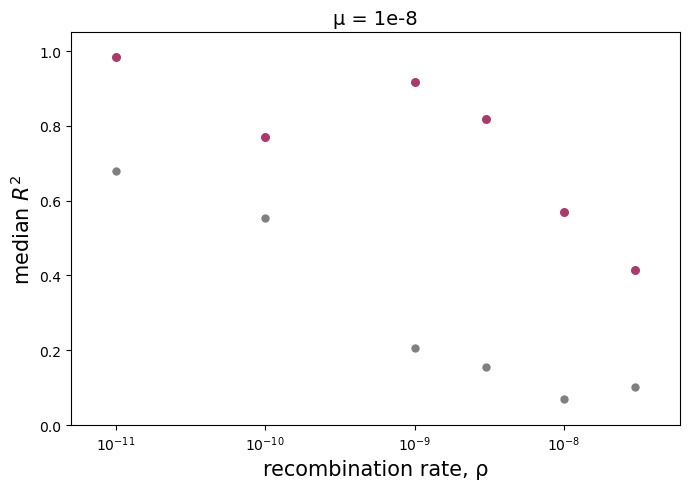

In [168]:
fig, ax = plt.subplots(figsize=(7, 5))

# colormap for different pm values
cmap = plt.get_cmap("mako")
pm_values = [0.001, 0.01, 0.1, 0.3, 1.0, 3.0]
colors = cmap(np.linspace(0, 1, len(pm_values)))

# aggregate so theres 1 row per (pm, rr) combo
inf_c = inf_s[inf_s['mu'] == 1e-8]
null_c = null_s[null_s['mu'] == 1e-8]

inf_fit = (inf_c.groupby(["pm", "rr"], as_index=False).agg(median_r2=("median_r2", "median")))

null_fit = (null_c.groupby(["pm", "rr"], as_index=False).agg(median_r2=("median_r2", "median")))


# plot per pm 
for pm, color in zip(pm_values, colors):
    # inferred
    sub_i = inf_fit[np.isclose(inf_fit["pm"], pm)]
    if len(sub_i):
        ax.scatter(
            sub_i["rr"], sub_i["median_r2"],
            s=30, alpha=1, color=bp_colors[2],
            label=f"ρ/μ={pm:g}"
        )
        if len(sub_i) >= 2:
            lx = np.log(sub_i["rr"].to_numpy())
            y = sub_i["median_r2"].to_numpy()
            m, b = np.polyfit(lx, y, 1)
            log_x = np.linspace(lx.min(), lx.max(), 200)
            ax.plot(np.exp(log_x), m * log_x + b, color=color, lw=2)

    # null (same color, lower alpha)
    sub_n = null_fit[np.isclose(null_fit["pm"], pm)]
    if len(sub_n):
        ax.scatter(
            sub_n["rr"], sub_n["median_r2"],
            s=25, alpha=1, color='grey'#,
           # label=f"null ρ/μ={pm:g}"
        )

    # if len(null_all):
    #     ax.scatter(
    #         null_s["rr"], null_s["median_r2"],
    #         s=12, alpha=0.75, c="lightgrey", label="null (permuted bins)"
    #     )
        # if len(sub_n) >= 2:
        #     lx = np.log(sub_n["rr"].to_numpy())
        #     y = sub_n["median_r2"].to_numpy()
        #     m, b = np.polyfit(lx, y, 1)
        #     log_x = np.linspace(lx.min(), lx.max(), 200)
        #     ax.plot(np.exp(log_x), m * log_x + b, color=color, lw=1, ls="--", alpha=0.35)

# fmt axes
ax.set_xscale("log")
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.set_ylim(0, 1.05)

# x limits from inferred, else use null
all_rr = inf_fit["rr"] if len(inf_fit) else null_fit["rr"]
ax.set_xlim(all_rr.min() * 0.5, all_rr.max() * 2.0)

ax.set_xlabel("recombination rate, ρ", fontsize=15)
ax.set_ylabel("median $R^2$", fontsize=15)

plt.title("μ = 1e-8", fontsize = 14)
#ax.legend(frameon=False, fontsize=12, loc="lower left", ncol=1)

fig.tight_layout()
#plt.savefig("figure_c.png")
plt.show()


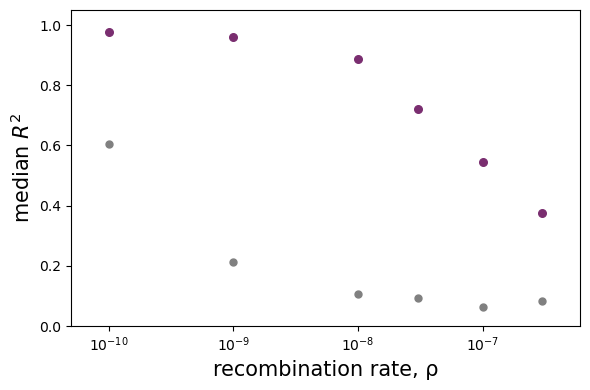

In [169]:
fig, ax = plt.subplots(figsize=(6, 4))

# colormap for different pm values
cmap = plt.get_cmap("mako")
pm_values = [0.001, 0.01, 0.1, 0.3, 1.0, 3.0]
colors = cmap(np.linspace(0, 1, len(pm_values)))

# aggregate so theres 1 row per (pm, rr) combo
inf_c = inf_s[inf_s['mu'] == 1e-7]
null_c = null_s[null_s['mu'] == 1e-7]

inf_fit = (inf_c.groupby(["pm", "rr"], as_index=False).agg(median_r2=("median_r2", "median")))

null_fit = (null_c.groupby(["pm", "rr"], as_index=False).agg(median_r2=("median_r2", "median")))


# plot per pm 
for pm, color in zip(pm_values, colors):


     # discrete mapping b/w rr and avg_breakpoints 
    bp_map = (
        inf_c[["rr", "avg_breakpoints"]]
        .dropna()
        .drop_duplicates(subset=["rr"])
        .sort_values("rr")
    )
    rr_ticks = bp_map["rr"].to_numpy()
    bp_labels = bp_map["avg_breakpoints"].to_numpy()

    
    # inferred
    sub_i = inf_fit[np.isclose(inf_fit["pm"], pm)]
    if len(sub_i):
        ax.scatter(
            sub_i["rr"], sub_i["median_r2"],
            s=30, alpha=1, color=bp_colors[3],
            label=f"ρ/μ={pm:g}"
        )
        # if len(sub_i) >= 2:
        #     lx = np.log(sub_i["rr"].to_numpy())
        #     y = sub_i["median_r2"].to_numpy()
        #     m, b = np.polyfit(lx, y, 1)
        #     log_x = np.linspace(lx.min(), lx.max(), 200)
        #     ax.plot(np.exp(log_x), m * log_x + b, color=color, lw=2)

    # null (same color, lower alpha)
    sub_n = null_fit[np.isclose(null_fit["pm"], pm)]
    if len(sub_n):
        ax.scatter(
            sub_n["rr"], sub_n["median_r2"],
            s=25, alpha=1, color='grey'#,
           # label=f"null ρ/μ={pm:g}"
        )


        # x axis showing just discrete breakpoints 
    ax.set_xscale("log")
    ax.xaxis.set_minor_locator(ticker.NullLocator())

    if len(rr_ticks):
        max_labels = 5  # tweak for clutter
        if len(rr_ticks) > max_labels:
            keep = np.linspace(0, len(rr_ticks) - 1, max_labels, dtype=int)
            rr_ticks_show = rr_ticks[keep]
            bp_labels_show = bp_labels[keep]
        else:
            rr_ticks_show = rr_ticks
            bp_labels_show = bp_labels

        ax.set_xticks(rr_ticks_show)
        ax.set_xticklabels([f"{b:g}" for b in bp_labels_show])

    # if len(null_all):
    #     ax.scatter(
    #         null_s["rr"], null_s["median_r2"],
    #         s=12, alpha=0.75, c="lightgrey", label="null (permuted bins)"
    #     )
        # if len(sub_n) >= 2:
        #     lx = np.log(sub_n["rr"].to_numpy())
        #     y = sub_n["median_r2"].to_numpy()
        #     m, b = np.polyfit(lx, y, 1)
        #     log_x = np.linspace(lx.min(), lx.max(), 200)
        #     ax.plot(np.exp(log_x), m * log_x + b, color=color, lw=1, ls="--", alpha=0.35)

# fmt axes
ax.set_xscale("log")
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.set_ylim(0, 1.05)

# x limits from inferred, else use null
all_rr = inf_fit["rr"] if len(inf_fit) else null_fit["rr"]
ax.set_xlim(all_rr.min() * 0.5, all_rr.max() * 2.0)

ax.set_xlabel("recombination rate, ρ", fontsize=15)
ax.set_ylabel("median $R^2$", fontsize=15)

#plt.title("μ = 1e-7", fontsize = 14)
#ax.legend(frameon=False, fontsize=12, loc="lower left", ncol=1)

fig.tight_layout()
#plt.savefig("figure_c_1e-7.png")
plt.show()
